# Understanding Freshman Satisfaction and Retention in Higher Education
- Madelyn Redick
- Sahana Dhar
- Shawn Lokshin

## Abstract
**summarizes the main results in a paragraph of no more than 6 sentences which is easily understood by laymen. Link to the graphs or sections later in the report which support each of the claims given in the abstract.**

This project investigates the qualities of universities that correspond to the amount of first year students that return for their second year. We obtained data from [The College Scorecard API](https://collegescorecard.ed.gov/data/documentation/) to collect various ifnormation from colleges in the United States.

TODO - main results

TODO - graphs or later sections

## Introduction

**a final, polished version of Project Proposal parts 1 and 3.**

TODO

## Understanding Freshman Satisfaction and Retention in Higher Education
### Madelyn Redick, Shawn Lokshin, Sahana Dhar

College and university life for students is an importance experience for many young adults nowadays. According to the Bureau of Labor Statistics, 61.8% of high school graduates were enrolled in college (2021). A significant issue that many institutions face is their impact on freshman satsifaction and the return rate of first year students. Colleges and unversities must continue adapting to the needs and expectations of the student bodies, in order to mintain enrollment rates. The questions we will be exploring in this projects are as follows:
1) What are the key determinants of freshman satisfaction within colleges, and how do they differ against institutions.
2) How do various institutional factors, such as tuition costs, diversity, academic calendar systems, on-campus housing availability, the number of undergraduates, and whether an institution is public or private, impact the likelihood of freshmen returning for their sophomore year? #TODO

These questions will include analyzing aspects of college life, such as the environment, diversity, facilities, and the student body, which ultimately impacts any students enjoyment of their college experience and their decision to continue their education there.


The collected data will be used for comprehensive data analysis, allowing us to understand the  elationship between various college factors and the key questions of interest: (1) understanding the determinants of freshman satisfaction, and (2) assessing the impact of institutional characteristics on the likelihood of freshmen returning for another year. By discovering correlations in factors, employing machine learning techniques, our analysis aims to provide colleges and universities with predictive insights that can guide colleges to enlist changes and techniques that will enhance the quality of the freshman experience and improve retention rates. 





## Data Description
**a final, polished version of Project Proposal part 2 as well as Data and Analysis Plan parts 2-4.**

TODO

TODO... add part 2 from from project proposal

### Pipeline Overview:
We webscrape from an [alphabetical list of colleges in the USA](https://www.4icu.org/us/a-z/) to create a list of names of colleges. 
We are using [The College Scorecard API](https://collegescorecard.ed.gov/data/documentation/) from the US Department of Education to obtain our data. This API allows us to get robust data for a specific school. For each school in the list of college names, we will filter desired data from the API into an organized dataframe. 

In [108]:
'''
import pandas as pd
import requests
import matplotlib.pyplot as plt
import time

# ACCESSING API
api_key = 'fK3eae9BKJ8nZKxDTxtAPEXjfi02c3oAhK5aPCdx' #sahana's key
api_key = 'eNxKT9YQ2JbnD6J2TjemGwcGDOfdKwLutysmZ7YM' #madelyn's key
api_key = 'fK3eae9BKJ8nZKxDTxtAPEXjfi02c3oAhK5aPCdx' #shawn's key
base_url = 'http://api.data.gov/ed/collegescorecard/v1/schools'


# GETTING LIST OF COLLEGE NAMES
college_names = []
tables = pd.read_html('https://www.4icu.org/us/a-z/')
table_colleges = tables[0]

# flatten table
table_colleges.columns = table_colleges.columns.get_level_values(0)

# access the column names
table_colleges.columns = ['Rank', 'Name', 'Location']

# add each name to list
for college in table_colleges['Name']:
    college_names.append(college)
    
    
def calculate_diversity(div_dict):
    """ calculates the proportion of students of color
    Arguments:
        div_dict (dict): contains data for racial diversity
    
    Returns:
        sum(valid_values) (int): final value to represent proportion of students of color
    """
    valid_values = [value for key, value in div_dict.items() if value is not None and key != "white" and key != "white_2000"]
    return sum(valid_values)
    
# initialize empty dataframe
result_df = pd.DataFrame(columns=['College', 'SAT', 'Acceptance Rate', 'Earnings 6 yrs after entry', 
                                  'Share First Generation', 'Retention Rate', 'Student Faculty Ratio', 
                                    'Mean Net Price', 'Diversity', 'Students with Loans',
                                     'Faculty Salary'])

# CREATING DF
for college_name in college_names:
    params = {
        'api_key': api_key,
        'school.name': college_name,
    }

    while True:
        response = requests.get(base_url, params=params)
    
        if response.status_code == 200:
            data = response.json()
        
            # Extract the desired data
            try:
                data = data['results'][0]['latest']
                sat_score = data['admissions']['sat_scores']['average']['overall']
                acceptance_rate = data['admissions']['admission_rate']['overall']
                earnings = data['earnings']['6_yrs_after_entry']['median']
                first_gen_percentage = data['student']['share_firstgeneration']
                retention = data['student']['retention_rate']['overall']['full_time']
                student_faculty_ratio = data['student']['demographics']['student_faculty_ratio']
                mean_net_price = data['cost']['avg_net_price']['overall']
                poc_proportion = calculate_diversity(data["student"]["demographics"]["race_ethnicity"])
                with_loans = data["aid"]["students_with_any_loan"]
                faculty_salary = data['school']['faculty_salary']
                
            
                # Create a DataFrame for the current college
                data_dict = {
                    'College': [college_name],
                    'SAT': [sat_score],
                    'Retention Rate': [retention],
                    'Acceptance Rate': [acceptance_rate],
                    'Earnings 6 yrs after entry': [earnings],
                    'Share First Generation': [first_gen_percentage],
                    'Student Faculty Ratio' : [student_faculty_ratio],
                    'Mean Net Price' : [mean_net_price],
                    'Diversity': [poc_proportion],
                    'Students with Loans' : [with_loans],
                    'Faculty Salary' : [faculty_salary]
                }

                college_df = pd.DataFrame(data_dict)

                # Concatenate the college DataFrame to the result_df
                result_df = pd.concat([result_df, college_df], ignore_index=True)
                break  # Exit the retry loop if the request was successful
            
            except (KeyError, IndexError):
                print(f"Data not found for {college_name}")
                break  # Exit the retry loop if the data is not found

        elif response.status_code == 429:
            # Wait for a reasonable delay (e.g., 6 seconds) before retrying
            print(f'Rate limit exceeded for {college_name}. Waiting and then retrying...')
            time.sleep(6)
            
        else:
            print(f'API request failed with status code: {response.status_code} for {college_name}')
            break  

# SAVE TO CSV
result_df.to_csv('college_data.csv', index=False)
'''

'\nimport pandas as pd\nimport requests\nimport matplotlib.pyplot as plt\nimport time\n\n# ACCESSING API\napi_key = \'fK3eae9BKJ8nZKxDTxtAPEXjfi02c3oAhK5aPCdx\' #sahana\'s key\napi_key = \'eNxKT9YQ2JbnD6J2TjemGwcGDOfdKwLutysmZ7YM\' #madelyn\'s key\napi_key = \'fK3eae9BKJ8nZKxDTxtAPEXjfi02c3oAhK5aPCdx\' #shawn\'s key\nbase_url = \'http://api.data.gov/ed/collegescorecard/v1/schools\'\n\n\n# GETTING LIST OF COLLEGE NAMES\ncollege_names = []\ntables = pd.read_html(\'https://www.4icu.org/us/a-z/\')\ntable_colleges = tables[0]\n\n# flatten table\ntable_colleges.columns = table_colleges.columns.get_level_values(0)\n\n# access the column names\ntable_colleges.columns = [\'Rank\', \'Name\', \'Location\']\n\n# add each name to list\nfor college in table_colleges[\'Name\']:\n    college_names.append(college)\n    \n    \ndef calculate_diversity(div_dict):\n    """ calculates the proportion of students of color\n    Arguments:\n        div_dict (dict): contains data for racial diversity\n    \n   

The code above displays our webscraping and API usage in order to build our DataFrame. Unfortunately, due to the rate limit of the API, we had to install a sleep timer in order to access all colleges without the API failing to return information. This led to our code taking approximately 80 minutes before the entire dataframe was built. For convenience, this code was only run once and immediately saved to a CSV, which was then used to complete the remainder of this project

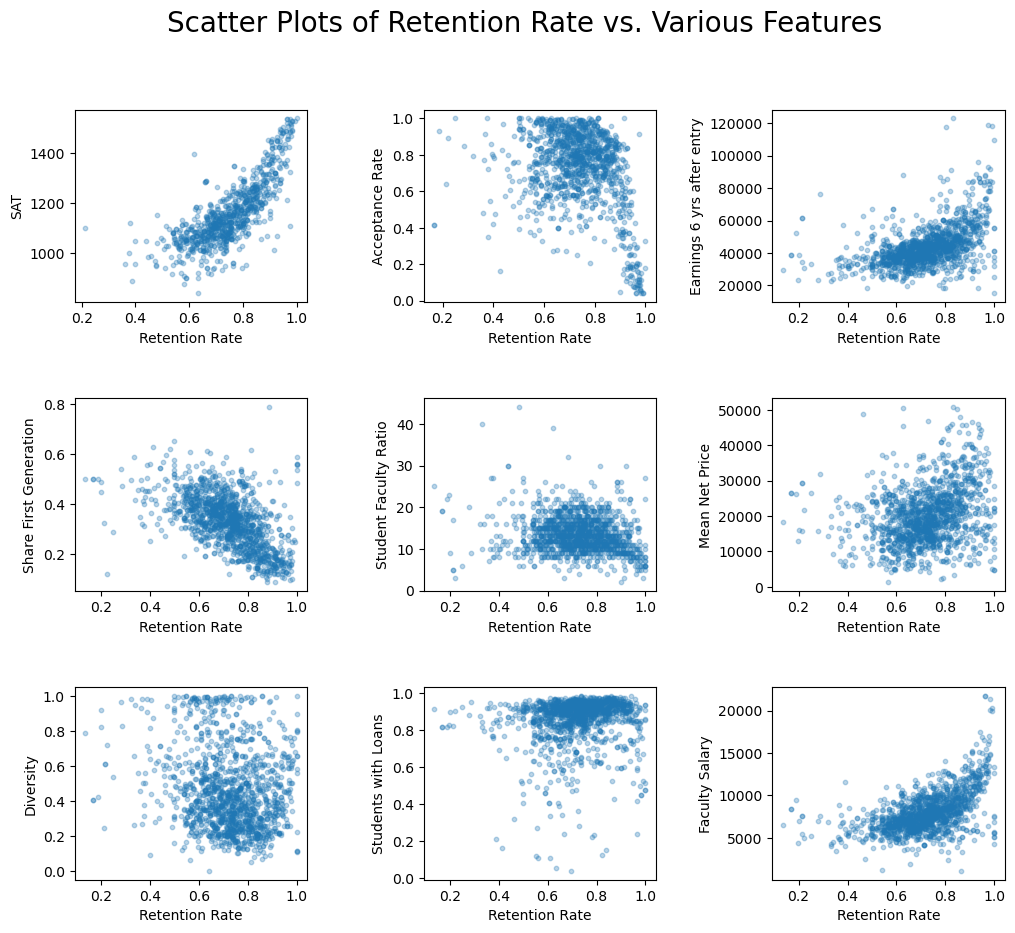

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
# convert csv to dataframe
df_colleges = pd.read_csv('college_data.csv')

# select numeric columns
columns = [item for item in df_colleges.columns if item not in ["Retention Rate", "College"]]

# create and format figure
plt.figure(figsize=(12, 10)) 
plt.suptitle("Scatter Plots of Retention Rate vs. Various Features", fontsize=20)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for idx, col in enumerate(columns):
    # activate specifc subplot
    plt.subplot(3, 3, idx+1)

    # plot scatter
    plt.scatter(df_colleges["Retention Rate"], df_colleges[col], s=10, alpha=0.3)
    plt.ylabel(col)
    plt.xlabel("Retention Rate")

## Method
The machine learning model we predict will be most fitting for our project is linear regression. We know that linear regression is used to predict a numeric variable y from various numeric variables x. Linear regression is important because it conveys R^2, the percentage of variance in y that can be explained by x. We may want to calculate R^2 and MSE using linear regression with predictors such as a college's admissions (SAT and acceptance rate), student body (size, diversity, student faculty ratio, and share first generation), and financials (mean tuition, mean net price, and earnings 6 years after entry) to see if we can predict the college's retention rate. We expect that some of these features will have an impact on the college's retention rate, though from the preliminary scatter plot analysis it is possible that admissions and financials are the most important features.  We will ensure that our numeric features are scaled before implementing machine learning, and will also make sure to cross validate, and if necessary, standardize while investigating different machine learning models.

We may also explore models such as decision trees and random forest, though we expect regression to be the most appropriate for our key questions. Additionally, we will consider feature selection techniques to maximize model accuracy and ensure the features elected are impactful.


**TODO...** 
- **Convince a technical expert that the method you chose is sound. Discuss any assumptions/pitfalls of the method and how they might impact the project.**
- **Educate an application expert on the broad outlines of the method you chose, providing a brief explanation of why this method is appropriate for the chosen problem.**

## Results

apply the ML method(s) of your choice, include:
- At least one graph of the results. Any graph should be explained in simple terms and easily interpretable on its own with appropriate labelling.
- Code and output which is clearly documented and implemented efficiently so as not to distract from the flow of the report.


TODO

## IMPORTS

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as stats
import pylab as py

## CLEANING

In [111]:
# load csv
df_college = pd.read_csv('college_data.csv')
# remove NaN
df_college = df_college.dropna() # only leaves 794 rows

# standardize x features
cols = [list(df_college.columns)[i] for i in range(len(list(df_college.columns))) if i not in [0, 5]]
df_standardized = df_college[cols] / df_college[cols].std()

# distribute the dataset into two components X and Y
cols = [list(df_college.columns)[i] for i in range(len(list(df_college.columns))) if i not in [0, 5]]
X = df_standardized[cols].to_numpy()
y = df_college['Retention Rate'].to_numpy()

## FEATURE IMPORTANCE FOR RANDOM FOREST

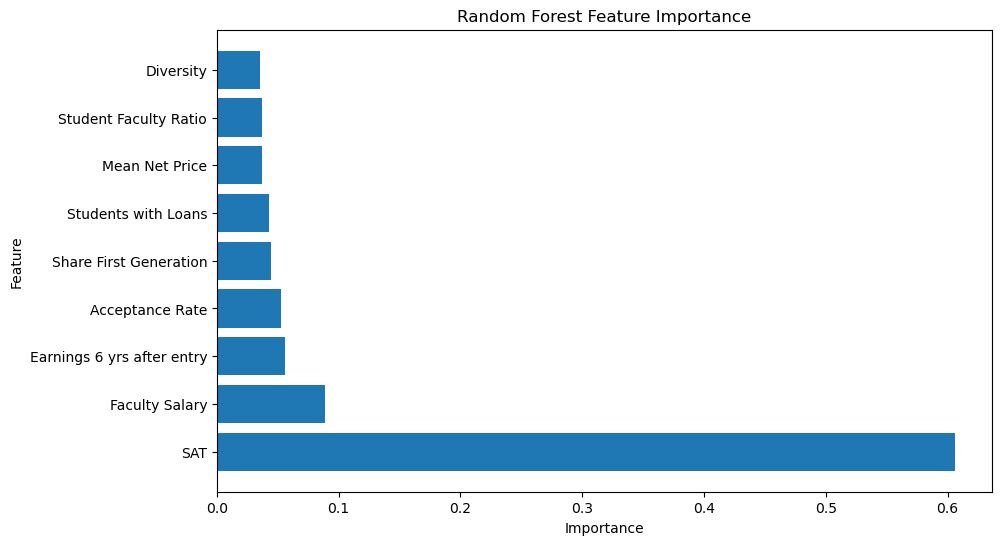

In [112]:
X = df_standardized 
y = df_college['Retention Rate'] 

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model on training data
rf_model.fit(X_train, y_train)

# get feature importances
feature_importances = rf_model.feature_importances_

# create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

## RUNNING RF ON IMPORTANT FEATS/ VISUALIZATIONS

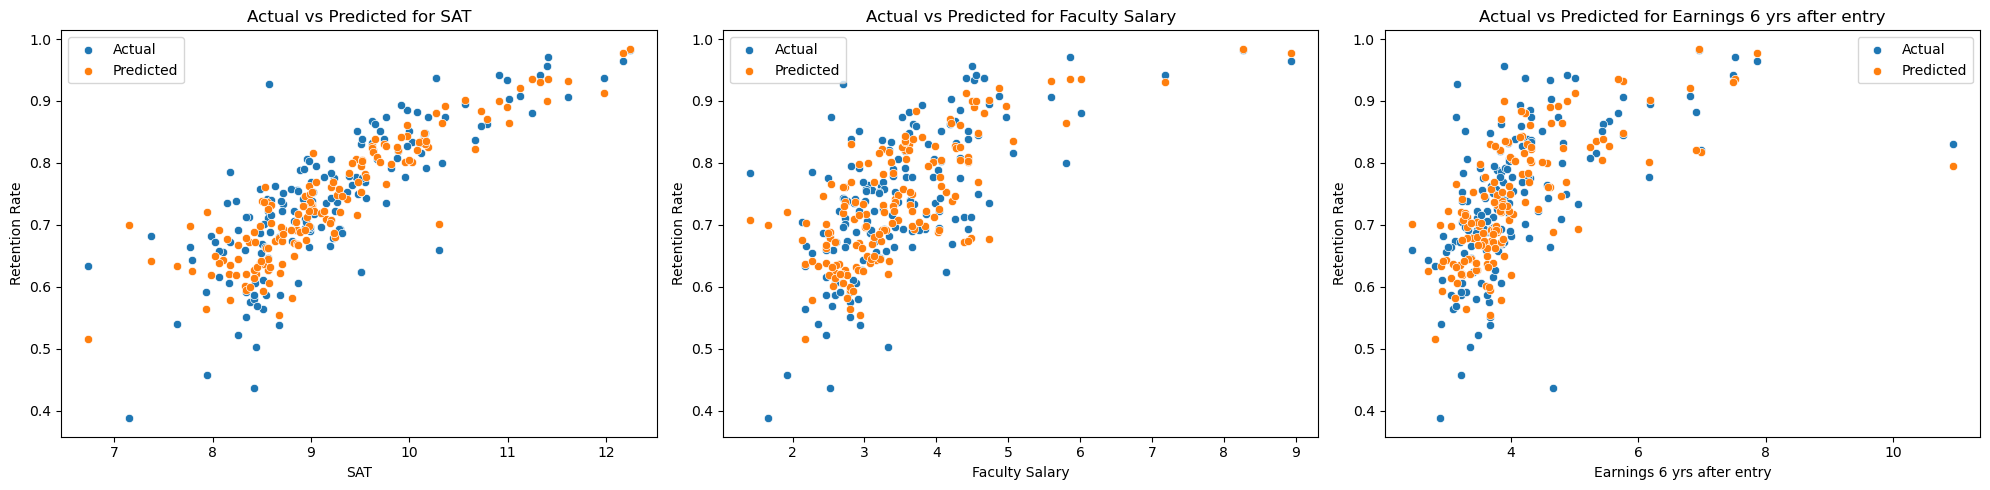

R2 Score: 0.6012
Mean Squared Error: 0.0051


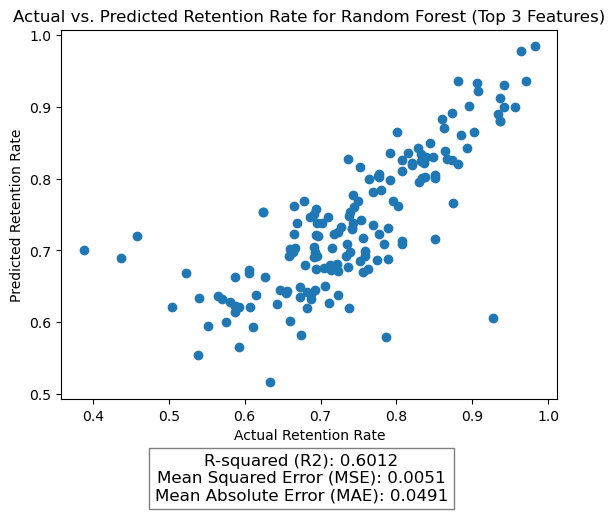

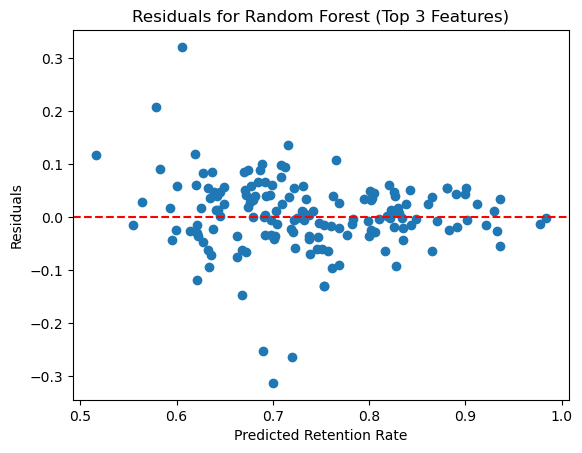

In [113]:
rf_features = ['SAT', 'Faculty Salary', 'Earnings 6 yrs after entry']

# define X and y
X = df_standardized[rf_features]
y = df_college['Retention Rate']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model on training data
rf_model.fit(X_train, y_train)

# make predictions on the test set
y_pred = rf_model.predict(X_test)

# create a DataFrame with actual and predicted values
prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# plot actual vs predicted for each feature
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# iterate over features
for idx, feature in enumerate(X.columns):
    # scatter plot for Actual values
    sns.scatterplot(x=feature, y='Actual', data=pd.concat([X_test, prediction_df], axis=1), ax=axes[idx])
    
    # scatter plot for Predicted values
    sns.scatterplot(x=feature, y='Predicted', data=pd.concat([X_test, prediction_df], axis=1), ax=axes[idx])
    
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Retention Rate')
    axes[idx].set_title(f'Actual vs Predicted for {feature}')
    axes[idx].legend(['Actual', 'Predicted'])

# adjust layout
plt.tight_layout()
plt.show()

# calculate and display R2 score and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R2 Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


# feature Importances
feature_importances = rf_model.feature_importances_

# creating a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': rf_features, 'Importance': feature_importances})

# sorting the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# predictions and residuals
y_pred = rf_model.predict(X_test)
residuals_selected = y_test - y_pred

# visualizing predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Retention Rate")
plt.ylabel("Predicted Retention Rate")
plt.title("Actual vs. Predicted Retention Rate for Random Forest (Top 3 Features)")

# calculate R2, MSE, and MAE
mse_selected = mean_squared_error(y_test, y_pred)
r2_selected = r2_score(y_test, y_pred)
mae_selected = mean_absolute_error(y_test, y_pred)

# display R2, MSE, and MAE
result_text = f'R-squared (R2): {r2_selected:.4f}\nMean Squared Error (MSE): {mse_selected:.4f}\nMean Absolute Error (MAE): {mae_selected:.4f}'
plt.figtext(0.5, -0.1, result_text, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

# visualizing residuals
plt.scatter(y_pred, residuals_selected)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Retention Rate")
plt.ylabel("Residuals")
plt.title("Residuals for Random Forest (Top 3 Features)")
plt.show()

## LINEAR REGRESSION FEAT IMPORTANCE

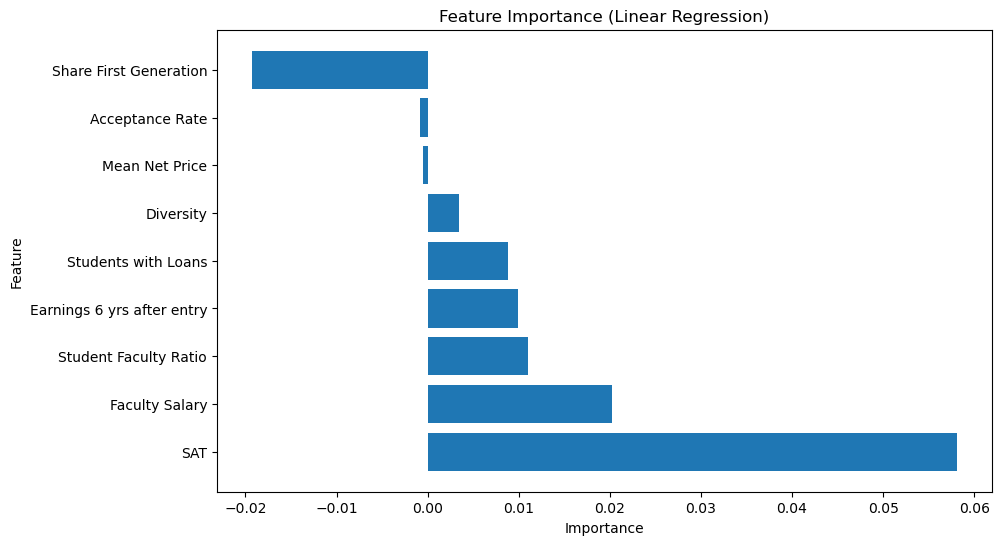

In [114]:
# extracting features and target variable
X = df_standardized
y = df_college['Retention Rate'].to_numpy()
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating a linear regression model
lr_model = LinearRegression()

# fitting the model on training data
lr_model.fit(X_train, y_train)

# getting feature importances (coefficients)
feature_importances = lr_model.coef_

# creating a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# sorting the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Linear Regression)')
plt.show()

## RUNNING LR ON IMPORTANT FEATS/ VISUALIZATIONS

In [115]:
def multiple_regression(cols):
    """ Fits a Multiple Linear Regression model to given columns.

    Arguments:
        cols (list): names of columns to be fed to Multiple Linear Regression.

    Returns:
        dictionary of relevant information of resulting model.
    """
    X = df_standardized[cols].to_numpy()
    y = df_college['Retention Rate'].to_numpy()

    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # create Linear Regression object to model the data
    linear_regression = LinearRegression()

    # train the model
    linear_regression.fit(X_train, y_train)

    # make predictions on the test set
    y_pred = linear_regression.predict(X_test)

    # evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    residuals = y_test - y_pred

    # create subplots for residuals vs feature
    num_features = len(cols)
    fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 5))


    # create a new figure for actual vs predicted plots
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(cols):
        plt.subplot(1, num_features, i+1)
        plt.scatter(X_test[:, i], y_test, label=f'Actual {feature}')
        plt.scatter(X_test[:, i], y_pred, label=f'Predicted {feature}', color='r', alpha=0.5)
        plt.legend()
        plt.xlabel(feature)
        plt.ylabel('Retention Rate')
        plt.title(f'Actual vs Predicted for {feature}')
        plt.suptitle(f'r2: {round(r2, 3)}, mse: {round(mse, 3)}, mae: {round(mae, 3)}')


    # plot residuals against each feature separately
    for i, feature in enumerate(cols):
        axes[i].scatter(x=X_test[:, i], y=residuals)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Residuals')
        axes[i].set_title(f'Residuals vs {feature}')
        
    # residuals plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x=range(len(y_test)), y=residuals)
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    # probability plot
    plt.figure(figsize=(8, 5))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Probability Plot')

    # adjust layout
    plt.tight_layout()
    plt.show()

    return {'mse': mse, 'r2': r2, 'mae': mae, 'residuals': residuals, 'X_test': X_test, 'y_test': y_test, 'y_pred': y_pred, 'features': cols}


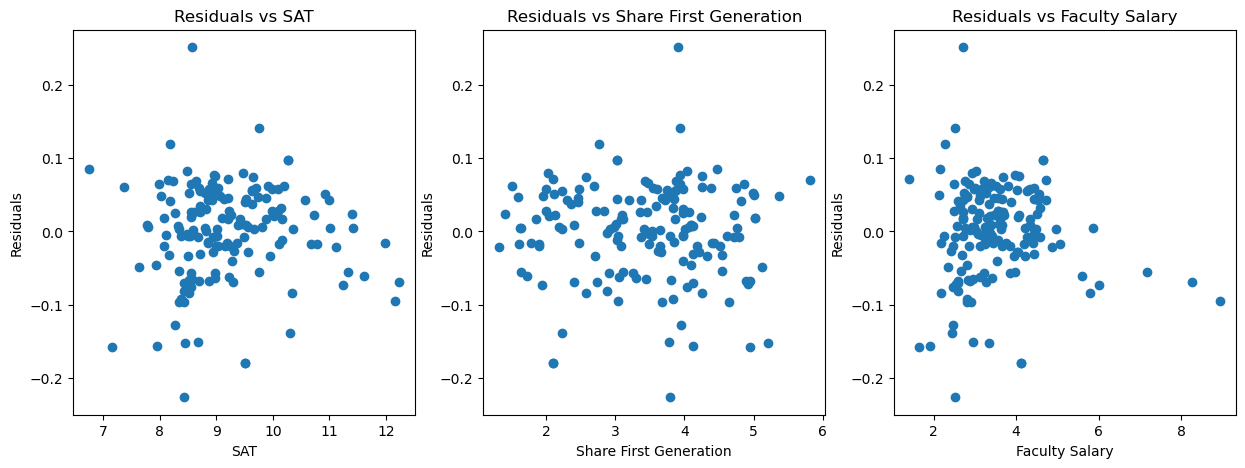

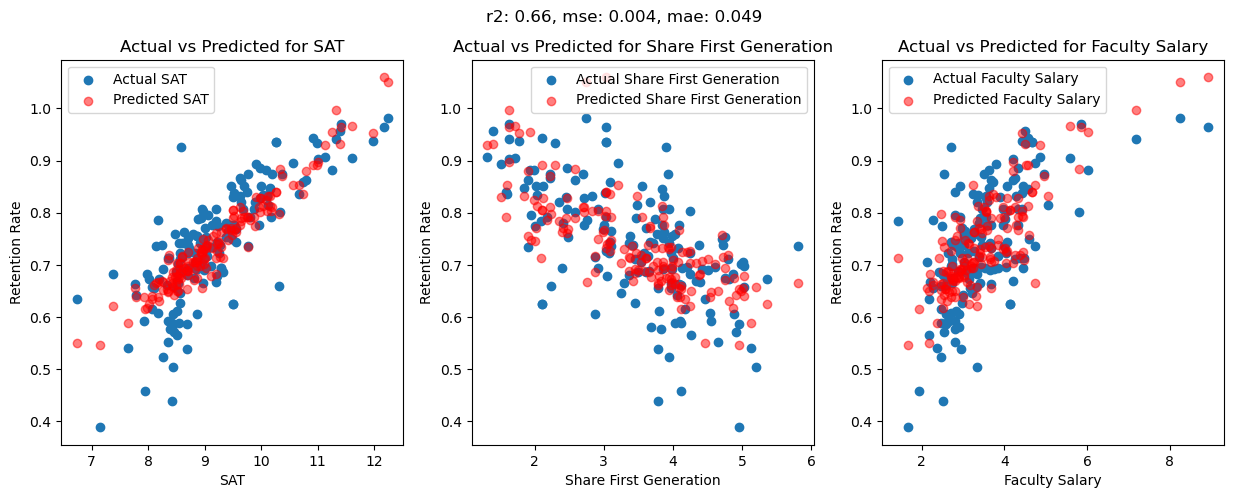

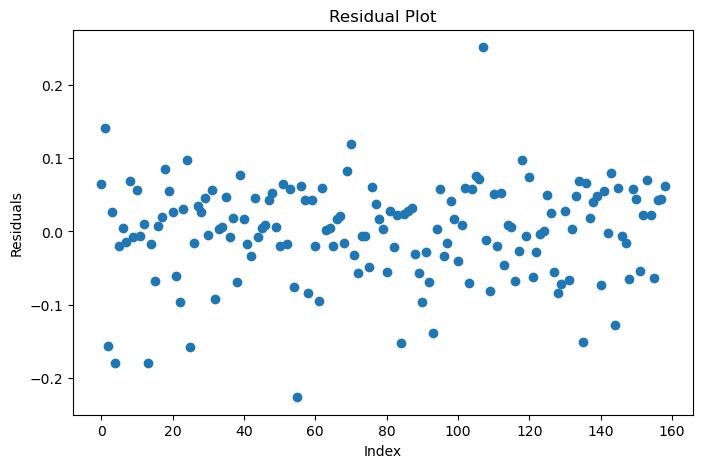

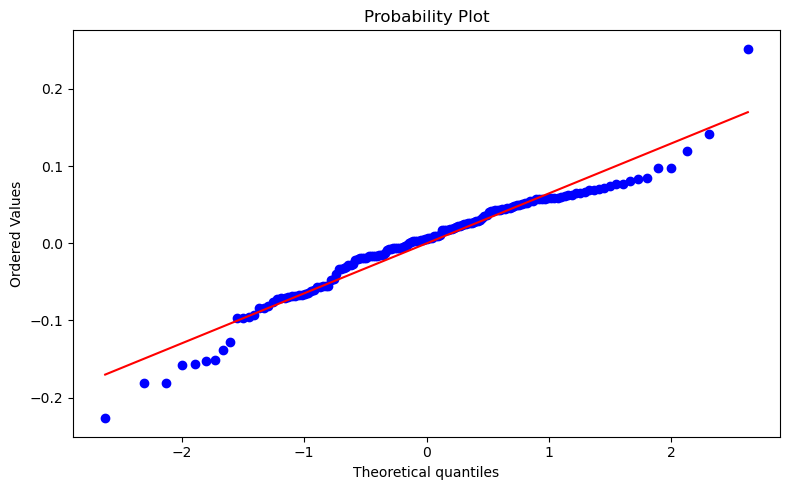

In [116]:
# fit a Multiple Linear Regression model with the top 3 features
mult_reg_model = multiple_regression(['SAT', 'Share First Generation', 'Faculty Salary'])
residuals = mult_reg_model['residuals']


## Discussion

**interpret your results in the application context. Determine if you found solutions to your questions of interest and explain why/why not. Critique your results; should they be accepted at face value or were some assumptions made inappropriate? What actions should be taken (if any) as a result of the analysis, and how confident are you in these actions? What questions that were unanticipated arose from the analysis, and what should future work/analyses focus on?**

TODO